## Preface



First, load relevant dataset:



In [1]:
# Install CFEdemands and load the tanzanian dataset.

!pip install CFEdemands
import cfe
import pandas as pd
import numpy as np

r = cfe.from_dataset('TanzanianNPS/tanzanian_nps.ds')
r

<xarray.Result>
Dimensions:           (i: 36, j: 13562, k: 8, kp: 8, m: 1, t: 4)
Coordinates:
  * j                 (j) object '0001-001' '0002-001' ... '905012325008102'
  * i                 (i) object 'Beef Including Minced Sausage' ... 'Yams/Cocoyams'
  * k                 (k) object 'C 0-2' 'C 2-5' 'C 6-9' ... 'Women' 'log HSize'
  * kp                (kp) object 'C 0-2' 'C 10-14' ... 'Women' 'log HSize'
  * t                 (t) int32 2008 2010 2012 2014
  * m                 (m) int32 1
Data variables:
    alpha             (i) float64 7.48 6.734 6.482 6.133 ... 4.978 5.052 6.358
    beta              (i) float64 1.213 1.286 1.002 1.239 ... 1.538 0.5749 0.806
    delta             (k, i) float64 ...
    prices            (i, t, m) float64 2.6e+03 3e+03 3.067e+03 ... 1.101 1.25
    characteristics   (k, j, t, m) float64 nan nan 0.0 nan ... nan 0.0 nan nan
    loglambdas        (j, t, m) float64 ...
    a                 (i, t, m) float64 ...
    yhat              float64 ...
    

Also, choose reference prices:



In [2]:
# Choose x (Budget) (e.g 0.0, 3927.94 6311.82 9838.72 80256.30)
x = 6311 

# Note selection of prices for 2014 for market 1
p = r.prices.sel(t=2014, m=1).copy()

# Set data from array to dataframe
p.to_dataframe().fillna(1).squeeze()

,t,m,prices
i,,,
Beef Including Minced Sausage,2014,1,2500.000000
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",2014,1,1.714286
Bread,2014,1,2.000000
"Buns, Cakes And Biscuits",2014,1,2.000000
Cassava Fresh,2014,1,1.200000
Chicken And Other Poultry,2014,1,8.333333
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",2014,1,1.363636
Coconuts (Mature/Immature),2014,1,1.428571
"Cooking Bananas, Plantains",2014,1,1.250000


In [21]:
newp = pd.read_csv('final-prices-our-prices-1.csv')
p.values = newp.iloc[:,0].values
p.values

array([ 727.6319759 ,  168.78      ,   94.30735631,  128.4551869 ,
         17.45983852,  269.1758711 ,   34.87531459,  189.9735659 ,
        235.8779425 ,  641.2571518 ,  572.55      ,  350.8914027 ,
        404.9138551 ,  198.3965863 ,  741.6179233 ,  399.9226732 ,
       2425.5       ,   48.31462149,  245.        ,  109.63      ,
         36.87918642, 1286.458     ,    3.74488257,   81.90244474,
       1491.035     ,   87.69044831,   99.46563945,   66.83104209,
         69.23415187,   43.31081359,  129.2533937 ,  102.9136    ,
         16.30105458, 1538.459     ,  720.2636049 ,   36.46746813])

And with $(x,p)$ defined we can calculate example demands:



In [5]:
# Load our price to the demand system
c=r.demands(x,p)
c

i
Beef Including Minced Sausage                               0.668994
Bottled/Canned Soft Drinks (Soda, Juice, Water)             1.638789
Bread                                                       2.045531
Buns, Cakes And Biscuits                                    1.072576
Cassava Fresh                                               4.027293
Chicken And Other Poultry                                   2.441531
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            4.788496
Coconuts (Mature/Immature)                                  0.999447
Cooking Bananas, Plantains                                  0.657926
Cooking Oil                                                 0.158313
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)          0.267142
Eggs                                                        0.520003
Fresh Fish And Seafood (Including Dagaa)                    0.500396
Fresh Milk                                                  0.942740
Goat Meat                       

Finally, define a function to change a single price in the vector $p$:



In [6]:
# Define a function to change a single price in the vector p for i (food item) :

def my_prices(p0,p=p,i='Bread'):
    p = p.copy()
    p.loc[i] = p0
    return p

## Mapping to Nutrients



We&rsquo;ve seen how to map prices and budgets into vectors of consumption
quantities using `cfe.Result.demands`.  Next we want to think about
how to map these into bundles of *nutrients*.  The information needed
for the mapping comes from a &ldquo;Food Conversion Table&rdquo; (or database,
such as the [USDA Nutrition DataBase](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md)).   Here we&rsquo;ve adapted (with
thanks to Alessandro Tarozzi of the Universitat Pompeu Fabra) a food
conversion table developed by Gopalan et al (1980) to the foods
reported in the Indian ICRISAT data:



In [8]:
# Read in the data of nutritional value of each food item
import pandas as pd
fct = pd.read_csv('fct-full-fct-full.csv').dropna(how='all')


# Change some labels so that the column names can be consistent.
d={'Item name': 'Item',
   'protein g':'Protein',
   'energy kcal':'Calories',
   'ca mg':'Calcium',
   'mg mg': 'Magnesium',
   'fe mg':'Iron',
   'zn mg':'Zinc',
   'vit a ug':'Vitamin A',
   'vit d ug':'Vitamin D',
   'vit e ug':'Vitamin E',
   'vit c mg':'Vitamin C',
   'vit b6 mg': 'Vitamin B6'}

fct = fct.rename(columns=d)[list(d.values())]

# Set the name of food item as index
fct.set_index('Item', inplace= True)

In [9]:
fct.head()

,Protein,Calories,Calcium,Magnesium,Iron,Zinc,Vitamin A,Vitamin D,Vitamin E,Vitamin C,Vitamin B6
Item,,,,,,,,,,,
Rice (Paddy),6.5,358.0,8.0,36.0,0.6,1.1,0.0,0.0,0.0,0.0,0.1
Rice (Husked),6.5,358.0,8.0,36.0,0.6,1.1,0.0,0.0,0.0,0.0,0.1
"Maize (Green, Cob, immature)",1.8,59.0,1.0,18.0,0.3,0.3,7.0,0.0,0.0,3.0,0.0
"Maize (Grain, dry, raw)",8.1,362.0,6.0,127.0,3.5,1.8,0.0,0.0,1.0,0.0,0.3
Maize (Flour),8.1,362.0,6.0,127.0,3.5,1.8,0.0,0.0,1.0,0.0,0.3


We need the index of the Food Conversion Table (FCT) to match up with
the index of the vector of quantities demanded.   To manage this we
make use of the `align` method for `pd.DataFrames`:



In [10]:
# Index of fct includes names of goods and also units.  Drop the latter:
try:
    fct.index = fct.index.droplevel('unit')
except AttributeError: pass # not a multiindex?

# Create a new FCT and vector of consumption that only share rows in common:
fct0, c0= fct.align(c,axis = 0, join='inner')
print(fct0.index)

Index(['Rice (Husked)', 'Maize (Flour)', 'Millet And Sorghum (Flour)', 'Bread',
       'Buns, Cakes And Biscuits', 'Macaroni, Spaghetti', 'Cassava Fresh',
       'Sweet Potatoes', 'Yams/Cocoyams', 'Irish Potatoes',
       'Cooking Bananas, Plantains', 'Sugar', 'Sweets',
       'Honey, Syrups, Jams, Marmalade, Jellies, Canned Fruits',
       'Peas, Beans, Lentils And Other Pulses', 'Groundnuts In Shell/Shelled',
       'Coconuts (Mature/Immature)',
       'Onions, Tomatoes, Carrots And Green Pepper, Other Viungo',
       'Spinach, Cabbage And Other Green Vegetables', 'Ripe Bananas',
       'Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)', 'Sugarcane',
       'Goat Meat', 'Beef Including Minced Sausage',
       'Chicken And Other Poultry', 'Eggs',
       'Fresh Fish And Seafood (Including Dagaa)',
       'Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)', 'Fresh Milk',
       'Milk Products (Like Cream, Cheese, Yoghurt Etc)', 'Cooking Oil',
       'Salt', 'Other Spices', 'Tea Dry',
 

Now, since rows of `fct0` and `c0` match, we can obtain nutritional
outcomes from the inner (or dot, or matrix) product of the transposed
`fct0` and `c0`:



In [12]:
# The @ operator means matrix multiply,
# Replace all values of NaN in the fct0 dataset with 0 so that no "Not a Number" values show up when we run "N"
fct0= fct0.replace(np.nan,0)
N = fct0.T@c0
N

Protein        316.168509
Calories      9903.175587
Calcium       3458.940863
Magnesium     1651.377972
Iron            73.430869
Zinc            42.990242
Vitamin A     7416.951508
Vitamin D       10.164771
Vitamin E       68.424854
Vitamin C      612.007186
Vitamin B6      12.657562
dtype: float64

Of course, since we can compute the nutritional content of a vector of
consumption goods `c0`, we can also use our demand functions to
compute nutrition as a *function* of prices and budget.



In [14]:
# Like above, we load prices into the demand system
# Then set fct0,c0 equal to a function that aligns fct and c on their inner axes 
def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    fct0= fct0.replace(np.nan,0)
    N = fct0.T@c0

    return N

With this `nutrient_demand` function in hand, we can see how nutrient
outcomes vary with budget, given prices:



Text(0, 0.5, 'log nutrient')

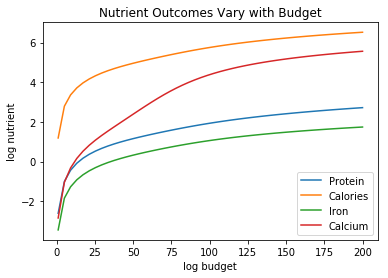

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(1,200,50) # Returns num = 50 evenly spaced samples calculated over the interval [1,200]

UseNutrients = ['Protein','Calories','Iron','Calcium'] 

plt.title("Nutrient Outcomes Vary with Budget")
plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[UseNutrients] for x in X},axis=1).T) 
# Takes X and Y arguments where X is the np.linespace line above and Y is the stuff to the right of the comma
# Y takes the log of what is returned from nutrient_demand(x,p) for each of the nutrients in UseNutrients over all the values in X
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

Now how does nutrition vary with prices?



Text(0, 0.5, 'log nutrient')

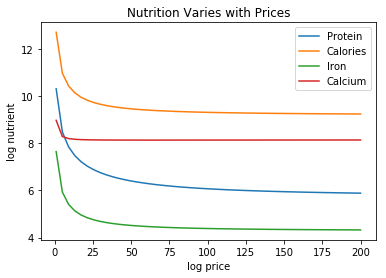

In [18]:
P = np.linspace(1,200,50) 

x = 6300 # Budget

plt.title("Nutrition Varies with Prices")
plt.plot(P,pd.concat({p0:np.log(nutrient_demand(x,my_prices(p0,i='Goat Meat')))[UseNutrients] for p0 in P},axis=1).T)
# Takes X and Y values
# In this case, P is the x-value and the stuff to the right of the comma is the Y value
# Y takes the log of what is returned from nutrient_demand(x,p) for each of the nutrients in UseNutrients over all the values in P
# In this case, we change the prices to reflect the prices of the item "Goat Meat"
plt.legend(UseNutrients)
plt.xlabel('log price')
plt.ylabel('log nutrient')

## Nutritional requirements



Individuals have nutritional requirements established by nutrition
scientists.  Here are some standards established by the Indian
National Institute of Nutrition:



### Nutritional needs of individuals



| Sex-Age|Calories|Protein|Fat|Calcium|Iron|Betacarotene|Thiamine|Riboflavin|Niacin|Ascorbic Acid|
|---|---|---|---|---|---|---|---|---|---|---|
| C 0-0.5||||500|||.2|.3||25|
| C 0.5-1|||19|500|5|2800|.3|.4||25|
| C 1-3|1060|16.7|27|600|9|3200|.5|.6|8|40|
| C 4-6|1350|20.1|25|600|13|3200|.7|.8|11|40|
| C 7-9|1690|29.5|30|600|16|4800|.8|1.|13|40|
| B 10-12|2190|39.9|35|800|21|4800|1.1|1.3|15|40|
| G 10-12|2010|40.4|35|800|27|4800|1.|1.2|13|40|
| B 13-15|2750|54.3|45|800|32|4800|1.4|1.6|16|40|
| G 13-15|2330|51.9|40|800|27|4800|1.2|1.4|14|40|
| B 16-17|3020|61.5|50|800|28|4800|1.5|1.8|17|40|
| G 16-17|2440|55.5|35|800|26|4800|1.|1.2|14|40|
| M|2730|60|30|600|17|4800|1.4|1.4|18|40|
| W|2230|55|25|1200|21|4800|1.1|1.3|14|40|



In [24]:
rda = pd.read_csv('Tanzania Daily Nutrition Minimum Requirement - nutrition-final.csv').set_index(['age'])

# Changing some labels to match the table labels
d={'child02': 'C 0-2',
   'child25': 'C 2-5',
   'child69': 'C 6-9',
   'child1014':'C 10-14',
   'child1517':'C 15-17',
   'men': 'Men',
   'women': 'Women'}

e={'protein (g)':'Protein',
   'energy (kcal)':'Calories',
   'calcium (mg)':'Calcium',
   'magnesium (mg)': 'Magnesium',
   'iron (mg)':'Iron',
   'zinc (mg)':'Zinc',
   'vitamin a (ug)':'Vitamin A',
   'vitamin d (ug)':'Vitamin D',
   'vitamin e (ug)':'Vitamin E',
   'vitamin c (mg)':'Vitamin C'
  # 'vit b6 mg': 'Vitamin B6'}
  }
   
rda = rda.rename(index=d).rename(columns=e)[list(e.values())] 

rda

KeyError: "['Calories'] not in index"

### Nutritional Needs of Households



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in the ICRISAT villages, the number of
different kinds of people can be computed by averaging over households:



In [37]:
# In 1975, averaged over households and villages
# This selects the column t where t = 2014. It takes the mean of columns j and m to produce the average men and women in a household

zbar = r.z.sel(t=2014).mean(['j','m'])[:-1] # Leave out log HSize
zbar.to_dataframe() # Turns zbar into a dataframe

,t,z
k,,
C 0-2,2014,0.351432
C 2-5,2014,0.476730
C 6-9,2014,0.712709
C 10-14,2014,0.635740
C 15-17,2014,0.214200
Men,2014,1.147375
Women,2014,1.319511


There are 1.6 men on average in a household, 1.5 women.

Now, the inner/dot/matrix product between `zbar` and the `rda`
DataFrame of requirements will give us minimum requirements for the
average household:


In [38]:
# This matrix product gives minimum nutrient requirements for average
# household (zbar) in 1975
# add up all the nutrients (rda) needed for a household, such as 1.5 men multiplied by how many nutrients men need
hh_rda = rda.replace('',0).T@zbar
hh_rda

Protein      1.672204e+02
Calories     9.282029e+03
Calcium      4.475033e+03
Magnesium    8.202510e+02
Iron         5.373313e+01
Zinc         2.764955e+01
Vitamin A    2.303040e+06
Vitamin D    2.428848e+01
Vitamin E    3.385211e+04
Vitamin C    1.928711e+02
dtype: float64

## Nutritional Adequacy of Food Demands



Since we can trace out demands for nutrients as a function of $(x,p)$,
and we&rsquo;ve computed minimum nutritional requirements for the average
household, we can *normalize* nutritional intake to check the adequacy
of diet.



In [40]:
# Takes the nutrition the household is getting (function of budget and prices) 
# and divides it by the the nutrients needded by that household
# to measure if households are meeting the nutritional requirements for the average household

def nutrient_adequacy_ratio(x,p):   
    
    return nutrient_demand(x,p)/hh_rda

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.



NameError: name 'nutrient_adequacy_ratio' is not defined

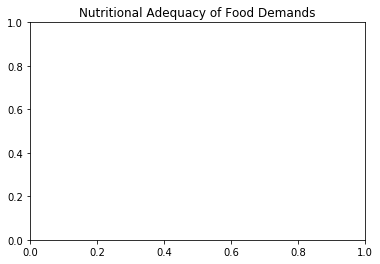

In [25]:
# plt.plot takes X and Y values
# Y takes the log of what is returned from nutrient_adequacy_ratio(x,p) for each of the nutrients 
# in UseNutrients over all the values in X

plt.title("Nutritional Adequacy of Food Demands")
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

As before, we can also vary relative prices.  Here we trace out
nutritional adequacy varying the price of Bengalgram dahl:



NameError: name 'nutrient_adequacy_ratio' is not defined

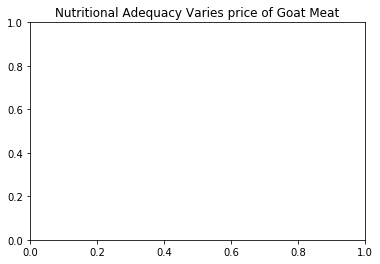

In [26]:
x = 20 # Set budget to 20

# Here, we vary the price of i, which is "Goat Meat"

plt.title("Nutritional Adequacy Varies price of Goat Meat")
plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Goat Meat')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i='Goat Meat').values)

And varying the price of rice:



NameError: name 'nutrient_adequacy_ratio' is not defined

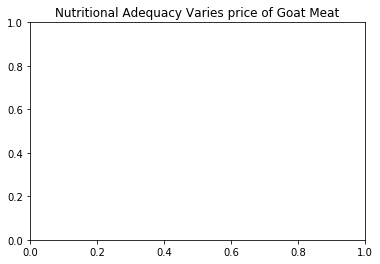

In [27]:
x = 20

# Here we do the same thing but instead of 

plt.title("Nutritional Adequacy Varies price of Goat Meat")
plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Goat Meat')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log NAR')
plt.axvline(0)
plt.axhline(p.sel(i='Goat Meat').values)